## Part 1 : Voronoi mesh generation

In [1]:
import warnings ## Org
warnings.filterwarnings('ignore') ## Org

import os, sys ## Org
import geopandas as gpd ## Org
from mf6Voronoi.geoVoronoi import createVoronoi ## Org
from mf6Voronoi.meshProperties import meshShape ## Org
from mf6Voronoi.utils import initiateOutputFolder, getVoronoiAsShp ## Org

In [2]:
#Create mesh object specifying the coarse mesh and the multiplier
vorMesh = createVoronoi(meshName='mineRegional',maxRef = 800, multiplier=1, overlapping=False) ## <==== update

#Open limit layers and refinement definition layers
vorMesh.addLimit('basin','../hatariUtils/catchment.shp') ##  <==== update+
vorMesh.addLayer('tailings','../shp/tailingsEnvelope.shp',100) ##  <==== update
vorMesh.addLayer('pit','../shp/pitShell.shp',100) ##  <==== update
vorMesh.addLayer('dump','../shp/wasteDump.shp',100) ##  <==== update
vorMesh.addLayer('river','../hatariUtils/river_basin.shp',150) ##  <==== update
vorMesh.addLayer('buffer','../hatariUtils/catchmentMinus500m.shp',450) ##  <==== update

In [3]:
#Generate point pair array
vorMesh.generateOrgDistVertices() ## Org

#Generate the point cloud and voronoi
vorMesh.createPointCloud() ## Org
vorMesh.generateVoronoi() ## Org

Follow us:,,,,,,



/--------Layer tailings discretization-------/
Progressive cell size list: [100, 200, 300, 400, 500, 600, 700, 800] m.

/--------Layer pit discretization-------/
Progressive cell size list: [100, 200, 300, 400, 500, 600, 700, 800] m.

/--------Layer dump discretization-------/
Progressive cell size list: [100, 200, 300, 400, 500, 600, 700, 800] m.

/--------Layer river discretization-------/
Progressive cell size list: [150, 300, 450, 600, 750] m.

/--------Layer buffer discretization-------/
Progressive cell size list: [450] m.

/----Sumary of points for voronoi meshing----/
Distributed points from layers: 5
Points from layer buffers: 6700
Points from max refinement areas: 1011
Points from min refinement areas: 814
Total points inside the limit: 10037
/--------------------------------------------/

Time required for point generation: 17.30 seconds 


/----Generation of the voronoi mesh----/

Time required for voronoi generation: 7.19 seconds 



In [4]:
#Export generated voronoi mesh
initiateOutputFolder('../output') ##  <==== update
getVoronoiAsShp(vorMesh.modelDis, shapePath='../output/'+vorMesh.modelDis['meshName']+'.shp') ##  <==== update

The output folder ../output exists and has been cleared

/----Generation of the voronoi shapefile----/

Time required for voronoi shapefile: 0.76 seconds 



<Axes: >

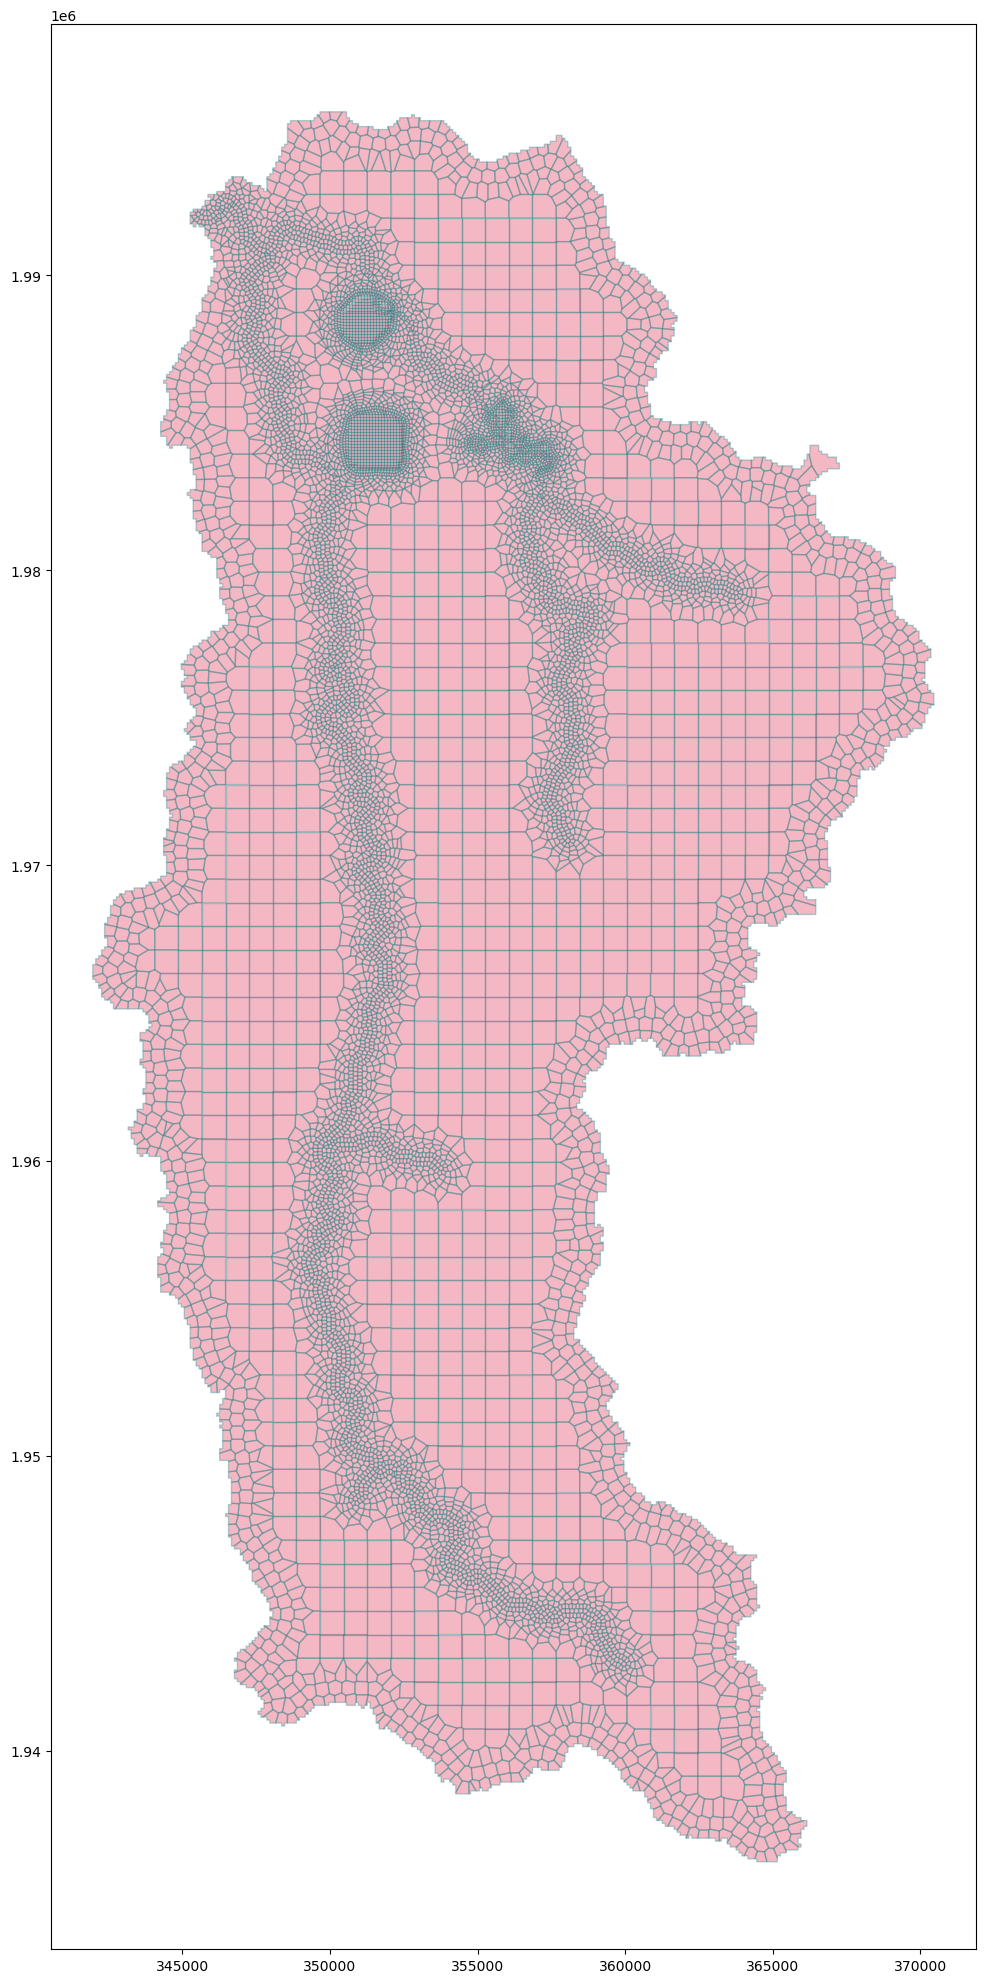

In [5]:
# Show the resulting voronoi mesh

#open the mesh file
mesh=gpd.read_file('../output/'+vorMesh.modelDis['meshName']+'.shp') ## Org
#plot the mesh
mesh.plot(figsize=(35,25), fc='crimson', alpha=0.3, ec='teal') ## Org

## Part 2 generate disv properties

In [6]:
# open the mesh file
mesh=meshShape('../output/'+vorMesh.modelDis['meshName']+'.shp') ## Org

In [7]:
# get the list of vertices and cell2d data
gridprops=mesh.get_gridprops_disv() ## Org


Creating a unique list of vertices [[x1,y1],[x2,y2],...]


100%|██████████| 10040/10040 [00:00<00:00, 39089.22it/s]



Extracting cell2d data and grid index


100%|██████████| 10040/10040 [00:01<00:00, 9209.40it/s]


In [8]:
#create folder
initiateOutputFolder('../json') ## Org

#export disv
mesh.save_properties('../json/disvDict.json') ## Org

The output folder ../json exists and has been cleared


In [9]:
mesh,

(<mf6Voronoi.meshProperties.meshShape at 0x23b4149f4d0>,)